<a href="https://colab.research.google.com/github/Kavesh-raja/Machine-Learning/blob/main/Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import librosa
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from matplotlib import  pyplot as plt
from glob import glob
import warnings
import numpy as np
import IPython.display as ipd
import numpy as np

In [3]:
warnings.filterwarnings("ignore")
mfccs =[]
spectral_centroid =[]
audio_files = glob('audio/*.wav')
l = len(audio_files)

In [4]:
for i in range (l):
    animal, sr = librosa.load(audio_files[i])
    mfccs_anim = librosa.feature.mfcc(y=animal, sr=sr, n_mfcc=20)
    spectral_centroids_anims = librosa.feature.spectral_centroid(y=animal, sr=sr)
    mfccs.append(max(mfccs_anim[9]))
    spectral_centroid.append(max(max(spectral_centroids_anims)))

In [5]:
df = pd.DataFrame()
df['mfcc'] = mfccs
df['spectral'] = spectral_centroid
scaler = StandardScaler()
df[['mfcc_t','spectral_t']] =  scaler.fit_transform(df[['mfcc','spectral']])
KM = KMeans(n_clusters=2)
y_predict = KM.fit_predict(df[['mfcc','spectral']])
df['cluster'] = y_predict
print(df)

        mfcc     spectral    mfcc_t  spectral_t  cluster
0  19.957203  3098.452032 -0.616497    0.757105        0
1  31.278988  1973.660546  0.007921   -1.293619        1
2  19.093603  3562.220336 -0.664127    1.602649        0
3  14.212362  2868.710360 -0.933336    0.338239        0
4  68.688110  2410.670350  2.071106   -0.496861        1
5  33.581944  2185.434337  0.134933   -0.907513        1


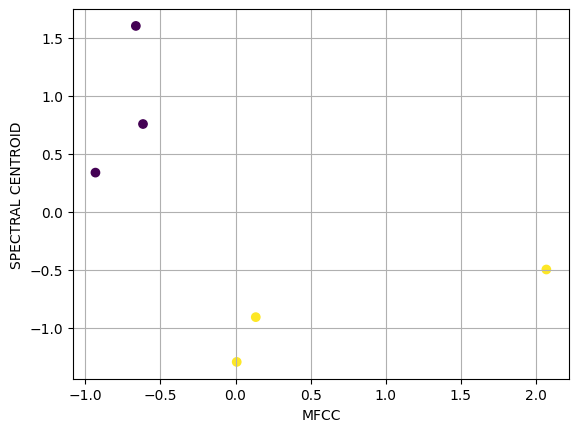

In [6]:
plt.scatter(df['mfcc_t'],df['spectral_t'],c=df['cluster'])
plt.grid()
plt.xlabel('MFCC')
plt.ylabel('SPECTRAL CENTROID')
plt.show()

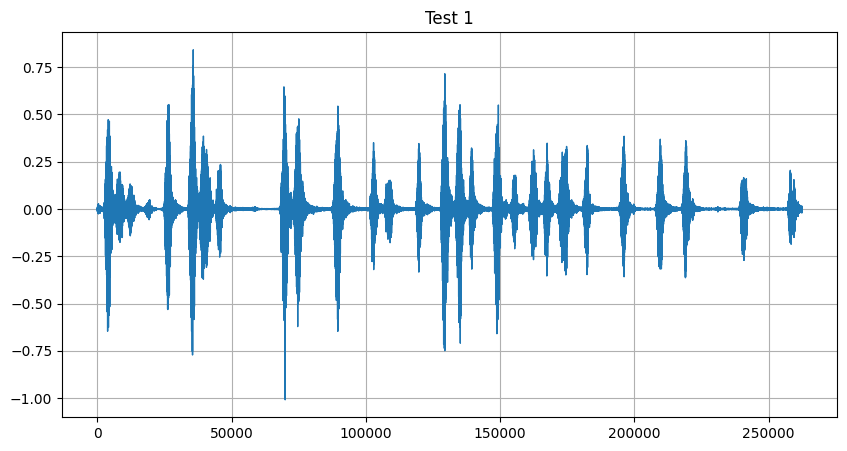

In [7]:
y, sr = librosa.load(audio_files[0])
pd.Series(y).plot(figsize = (10,5),lw = 1,title = 'Test 1')
plt.grid()
plt.show()

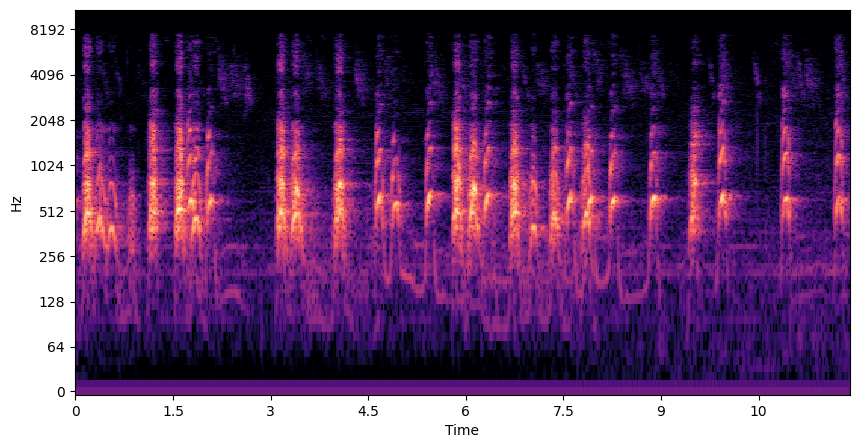

In [8]:
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D),ref =np.max)
fig, ax = plt.subplots(figsize = (10,5))
img = librosa.display.specshow(S_db,x_axis='time',y_axis='log',ax =ax)
plt.show()